      TASK 2 

      TEERTH CHAUHAN

Step 1: Loading the Dataset

In [2]:
import pandas as pd

In [3]:
iris = pd.read_csv("E:\INTERNSHIPS\ORISON TECHNOLOGY\TASK 2\iris - iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Let's see how many examples we have of each species
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
print(iris.describe)

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


Step 2: Data Cleaning & Preprocessing
1. Handling Missing Values

In [7]:
from sklearn.impute import SimpleImputer

# Check for missing values
print(iris.isnull().sum())


#There are no missing values therefore no handling of missing values needed 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


2. Encoding the Target Variable (species)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable 'species'
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])


# Check unique encoded values
print(iris['species'].unique())  


[0 1 2]


3. Normalizing the Features

In [9]:
from sklearn.preprocessing import StandardScaler

# Features (independent variables)
X = iris.drop('species', axis=1)

In [10]:
# Target (dependent variable)
y = iris['species']

# Normalize the feature variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
# Checking the  normalized data
print(X[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Step 3: Model Selection & Training
1. Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


2. Choosing a Basic Model (Decision Tree)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

Step 4: Model Evaluation
1. Predict on Test Data


In [14]:
# Make predictions on test data
y_pred = model.predict(X_test)


2. Evaluate the Model

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [16]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Evaluating  the  model using metrics like accuracy or mean squared error

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0
R-squared: 1.0


Predictions on the new data 

In [19]:
# New data point (features need to be normalized using the same scaler)
new_data = [[5.0, 3.3, 1.4, 0.2]]
new_data_normalized = scaler.transform(new_data)

# Make prediction
new_prediction = model.predict(new_data_normalized)
print(f"Predicted species: {le.inverse_transform(new_prediction)[0]}")


Predicted species: setosa


C:\Users\Teerrh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Confusion Matrix Visualization of Decision Tree

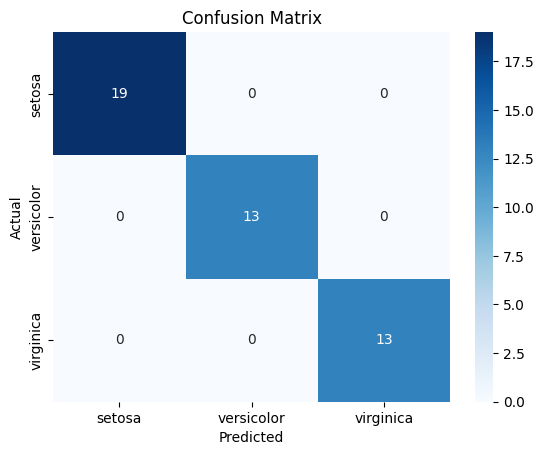

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


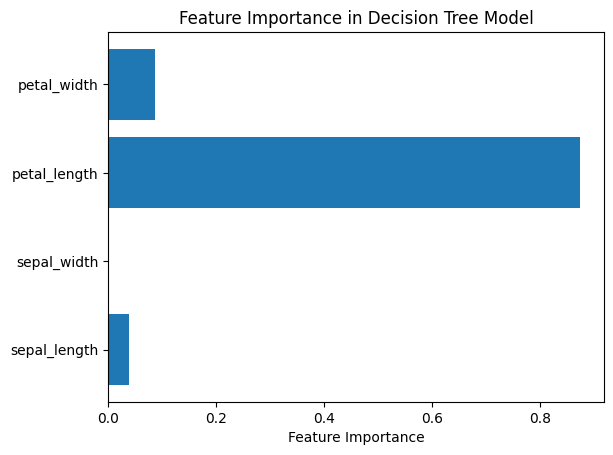

In [21]:
# Feature importance plot for Decision Tree
importances = model.feature_importances_
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


Steps to Implement Pruning, Accuracy Comparison, and Random Forest:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree




data = pd.read_csv("E:\INTERNSHIPS\ORISON TECHNOLOGY\TASK 2\iris - iris.csv")

# Features and target
X = data.drop('species', axis=1)
y = data['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Plotting Decision Tree (Pruned)

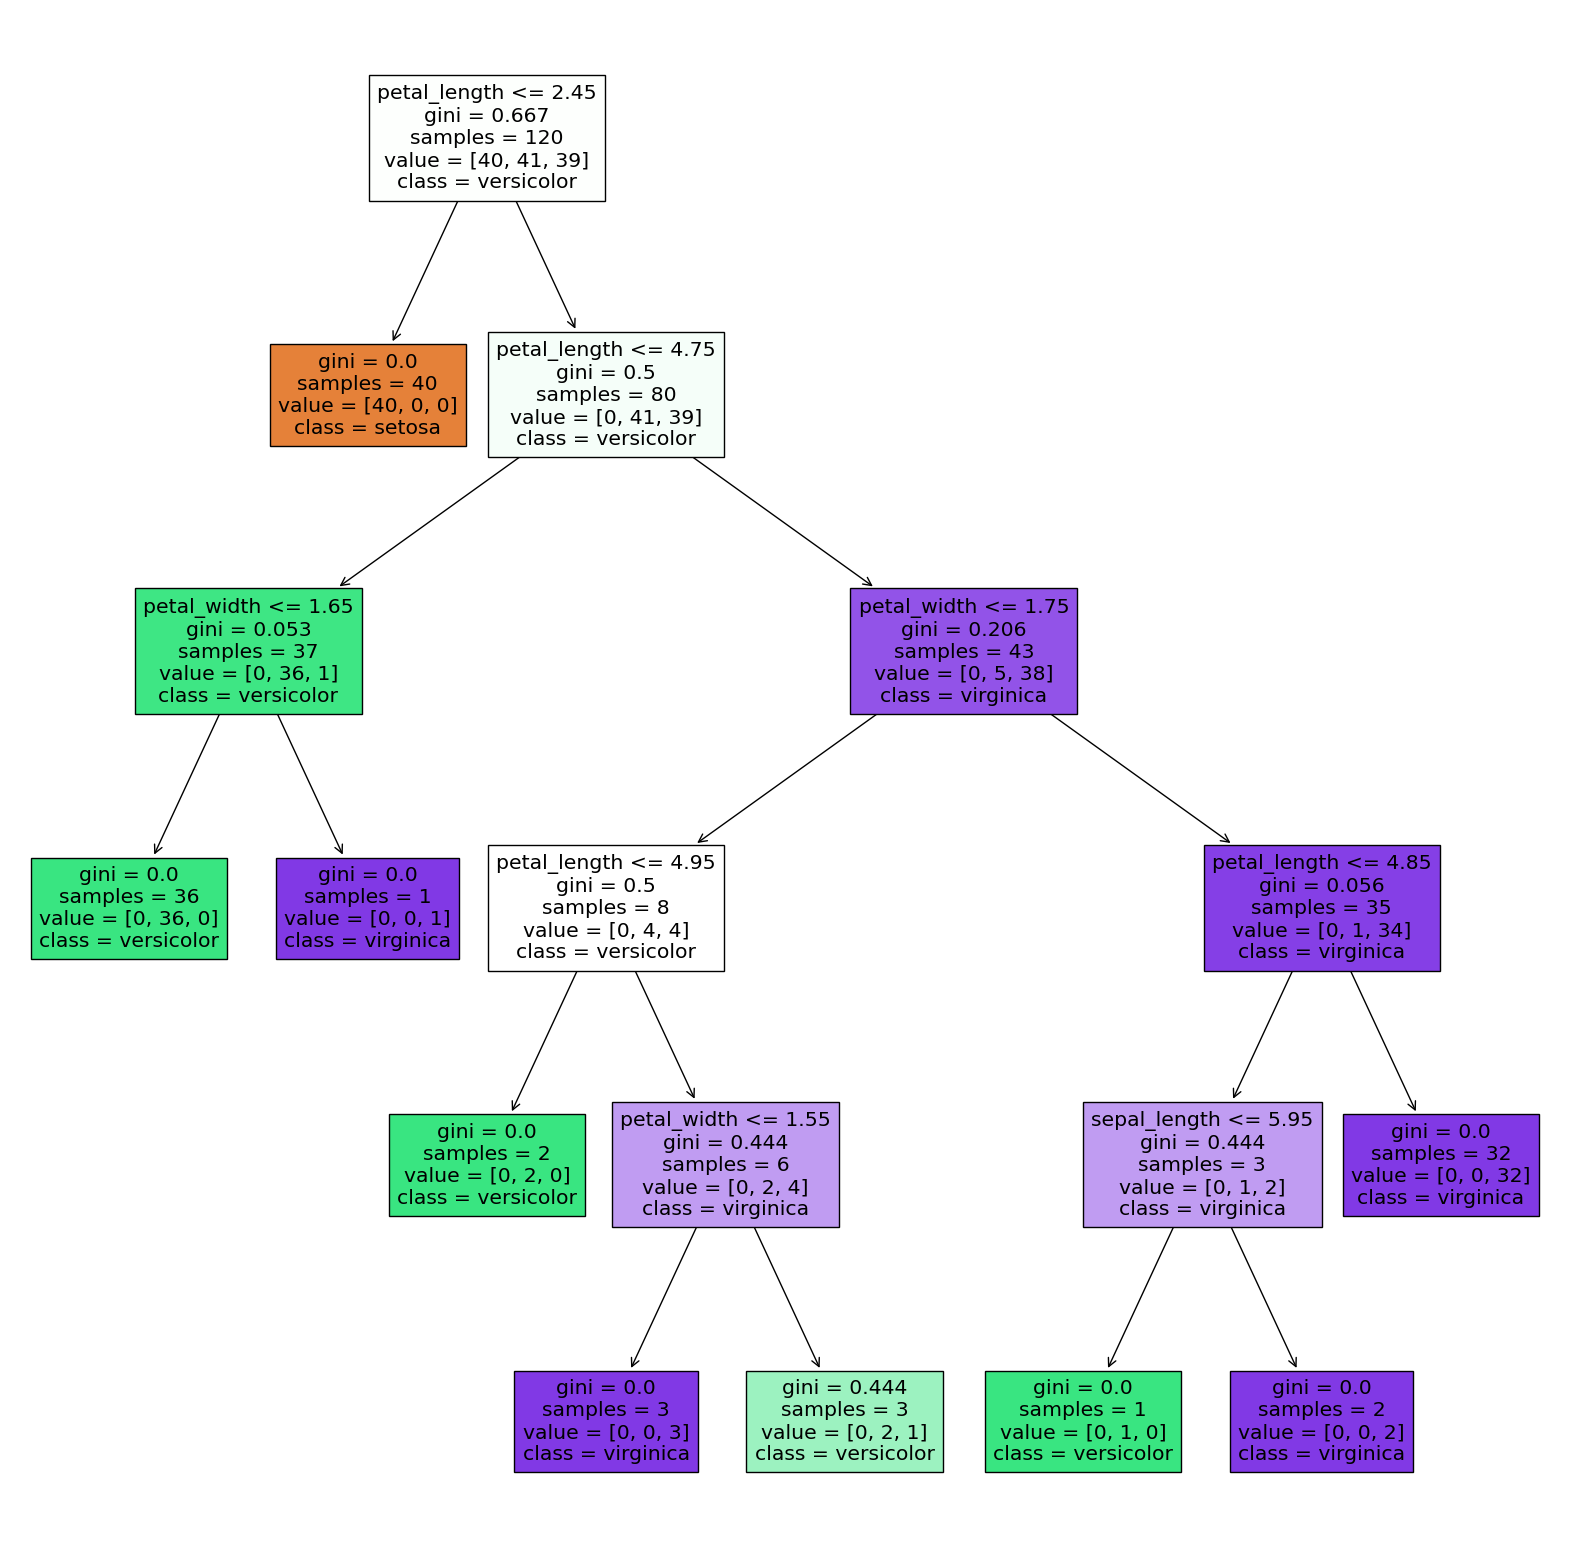

Pruned Tree Accuracy: 1.0


In [23]:
# Train Decision Tree with max_depth (pruning)
plt.figure(figsize=(20, 20))
model_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=1)
model_gini.fit(X_train, y_train)

# Plot pruned Decision Tree
tree.plot_tree(model_gini, filled=True, feature_names=X.columns, class_names=model_gini.classes_)
plt.show()

# Making predictions with the pruned tree
y_pred = model_gini.predict(X_test)

# Evaluating accuracy
print("Pruned Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))


Vary Depth and Compare Accuracy

In [24]:

for i in range(2, 30):
    model_gini_1 = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=i, min_samples_leaf=1)
    model_gini_1.fit(X_train, y_train)
    y_pred1 = model_gini_1.predict(X_test)
    print(f'Accuracy for depth = {i}: {metrics.accuracy_score(y_test, y_pred1) * 100:.2f}%')


Accuracy for depth = 2: 96.67%
Accuracy for depth = 3: 100.00%
Accuracy for depth = 4: 100.00%
Accuracy for depth = 5: 100.00%
Accuracy for depth = 6: 100.00%
Accuracy for depth = 7: 100.00%
Accuracy for depth = 8: 100.00%
Accuracy for depth = 9: 100.00%
Accuracy for depth = 10: 100.00%
Accuracy for depth = 11: 100.00%
Accuracy for depth = 12: 100.00%
Accuracy for depth = 13: 100.00%
Accuracy for depth = 14: 100.00%
Accuracy for depth = 15: 100.00%
Accuracy for depth = 16: 100.00%
Accuracy for depth = 17: 100.00%
Accuracy for depth = 18: 100.00%
Accuracy for depth = 19: 100.00%
Accuracy for depth = 20: 100.00%
Accuracy for depth = 21: 100.00%
Accuracy for depth = 22: 100.00%
Accuracy for depth = 23: 100.00%
Accuracy for depth = 24: 100.00%
Accuracy for depth = 25: 100.00%
Accuracy for depth = 26: 100.00%
Accuracy for depth = 27: 100.00%
Accuracy for depth = 28: 100.00%
Accuracy for depth = 29: 100.00%


Apply Random Forest and Compare Performance

In [25]:
# Initialize and train the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions using Random Forest
y_pred_rf = rfc.predict(X_test)

# Evaluate accuracy for Random Forest
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


Confusion Matrix for Random Forest

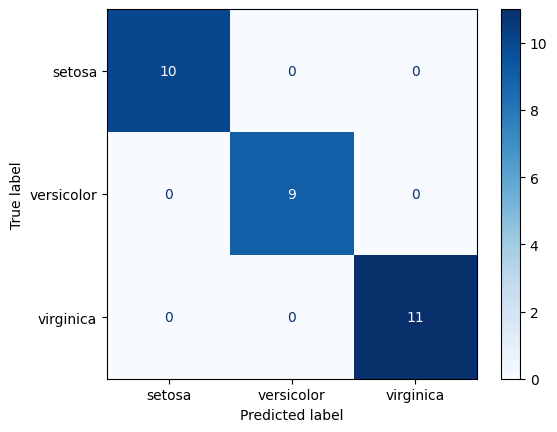

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Feature Importance in Random Forest

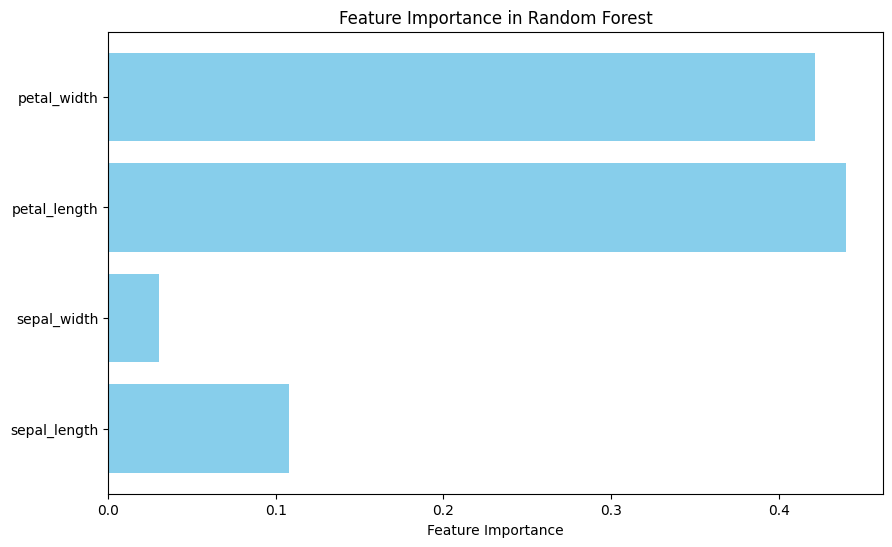

In [27]:
feature_importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()



LINEAR REGRESSION MODEL 

In [28]:
# Select only the features (numerical data) and the target variable (species)
# Since Linear Regression works with numerical data, convert the species to numerical if needed
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = pd.factorize(data['species'])[0]  # Convert species into numerical labels

In [29]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#  Training Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
#Model Evaluation
# Mean Squared Error (MSE)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.04


In [42]:
# R^2 Score (Coefficient of Determination)
r2 = metrics.r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.95


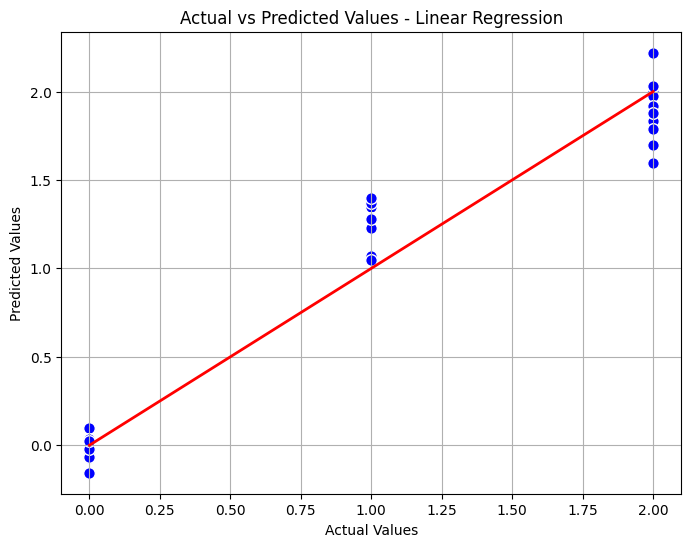

In [49]:
#  Visualizations

# i. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w', s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line (ideal prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Linear Regression')
plt.grid(True)
plt.show()



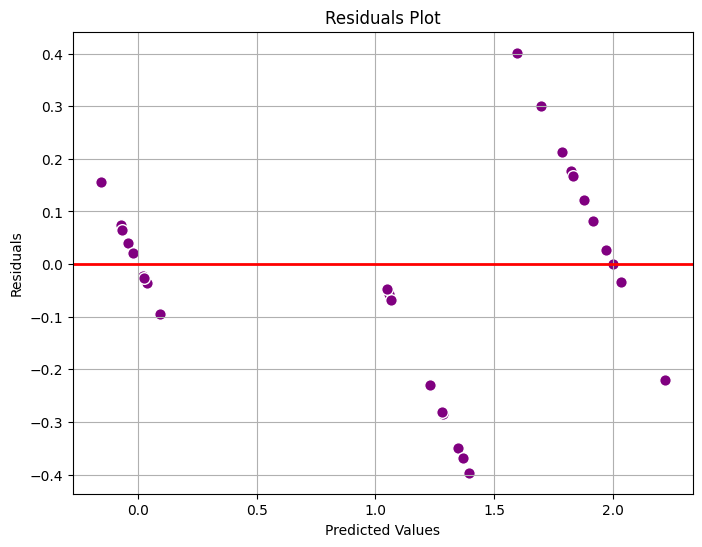

In [46]:
# ii. Residuals Plot (Error plot)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='w', s=70)
plt.axhline(y=0, color='red', lw=2)  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()




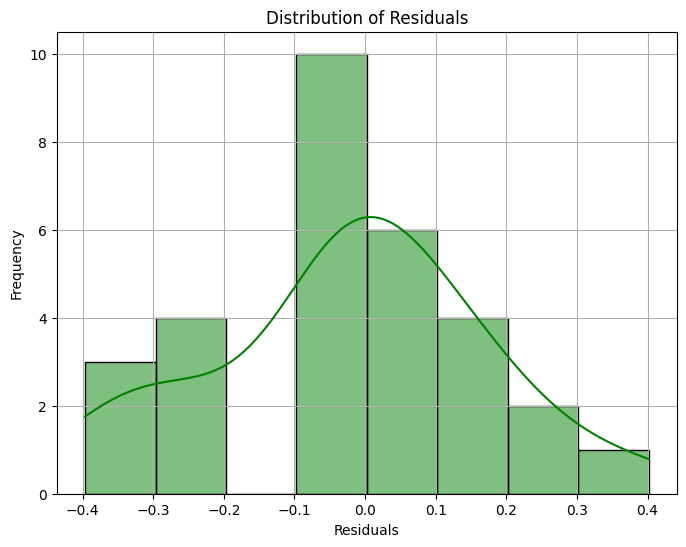

In [47]:
# iii. Distribution of Residuals (to check for normality of errors)
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



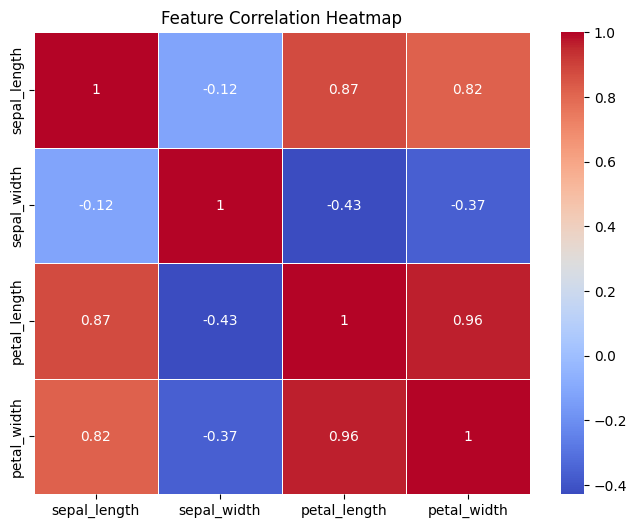

In [48]:
# Correlation Heatmap (for checking multicollinearity)
plt.figure(figsize=(8, 6))
sns.heatmap(data.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()